# Thống kê mô tả

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
df = pd.read_csv(r"E:\BTLPTDLL-2025\datasets\processed_data_2020_2021.csv")
df.head()

,Date,Station name,Wind,CO,Dew,Humidity,NO2,O3,PM10,PM2.5,Pressure,SO2,Temperature,AQI index,Dominent pollutant,Status
0,2020-01-01,Huế,2.0,5.5,19.2,83.0,14.0,5.0,31.0,18.0,1013.0,5.0,22.0,63.0,PM2.5,Moderate
1,2020-01-01,Hà Nội,2.0,5.5,19.2,83.0,14.0,5.0,31.0,164.0,1013.0,5.0,22.0,214.0,PM2.5,Very Unhealthy
2,2020-01-01,Hạ Long,2.0,5.5,19.2,83.0,14.0,5.0,31.0,83.0,1013.0,5.0,22.0,165.0,PM2.5,Unhealthy
3,2020-01-01,Hồ Chí Minh,2.0,5.5,19.2,83.0,14.0,5.0,31.0,74.0,1013.0,5.0,22.0,161.0,PM2.5,Unhealthy
4,2020-01-02,Huế,2.0,5.5,19.2,83.0,14.0,5.0,31.0,26.0,1013.0,5.0,22.0,80.0,PM2.5,Moderate


### Dữ liệu có bao nhiêu cột, bao nhiêu dòng

In [3]:
rows, cols = df.shape
rows, cols

(3941, 16)

### Mỗi dòng có ý nghĩa gì ?

Cụ thể ý nghĩa mỗi dòng là biểu diễn các chỉ số của chất gây nên ô nhiễm không khí tại thời gian và vị trí xác định, thể hiện tình trạng không khí tương ứng.

### Mỗi cột có ý nghĩa gì ?

Bao gồm 18 cột:
- AQI index: Chỉ số chất lượng không khí (Air Quality Index).
- Location: Vị trí địa lý của trạm quan trắc không khí.
- Station name: Tên trạm quan trắc không khí.
- Dominent pollutant: Chất gây ô nhiễm nổi bật.
- CO: Nồng độ khí CO (carbon monoxide).
- Dew: Điểm sương.
- Humidity: Độ ẩm.
- NO2: Nồng độ khí NO2 (nitrogen dioxide).
- O3: Nồng độ khí O3 (ozone).
- Pressure: Áp suất khí quyển.
- PM10: Nồng độ bụi mịn PM10 (particulate matter 10 micrometers or less).
- PM2.5: Nồng độ bụi mịn PM2.5 (particulate matter 2.5 micrometers or less).
- SO2: Nồng độ khí SO2 (sulfur dioxide).
- Temperature: Nhiệt độ.
- Wind: Tốc độ gió.
- Data Time S: Thời gian dữ liệu được ghi lại (theo múi giờ cục bộ).
- Status: Trạng thái dữ liệu.


### Các cột có kiểu dữ liệu gì

In [4]:
df.dtypes

Date                   object
Station name           object
Wind                  float64
CO                    float64
Dew                   float64
Humidity              float64
NO2                   float64
O3                    float64
PM10                  float64
PM2.5                 float64
Pressure              float64
SO2                   float64
Temperature           float64
AQI index             float64
Dominent pollutant     object
Status                 object
dtype: object

### Kiểm tra xem có cột nào bị thiếu dữ liệu không

In [5]:
df.isna().sum()

Date                  0
Station name          0
Wind                  0
CO                    0
Dew                   0
Humidity              0
NO2                   0
O3                    0
PM10                  0
PM2.5                 0
Pressure              0
SO2                   0
Temperature           0
AQI index             0
Dominent pollutant    0
Status                0
dtype: int64

### Tóm lược dữ liệu

In [6]:
numerical_des = df.describe()
numerical_des

,Wind,CO,Dew,Humidity,NO2,O3,PM10,PM2.5,Pressure,SO2,Temperature,AQI index
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,2.511799,5.979218,21.793847,78.181451,11.079117,8.312357,34.522482,55.012180,1004.266582,8.607054,25.451358,88.484522
std,3.183684,7.793144,4.562096,15.324423,7.227553,7.248769,26.232981,40.145244,16.159079,23.599763,4.775540,50.589007
min,0.200000,0.100000,-3.000000,13.000000,1.000000,0.900000,0.500000,0.500000,916.900000,0.100000,0.500000,1.000000
25%,2.000000,3.000000,19.500000,68.500000,7.400000,3.000000,18.000000,27.000000,1001.100000,2.000000,22.000000,50.000000
50%,2.000000,4.000000,23.000000,82.000000,11.000000,6.500000,27.000000,46.000000,1007.500000,5.000000,26.000000,76.000000
75%,3.000000,5.000000,25.000000,90.100000,13.000000,11.000000,42.000000,72.000000,1012.000000,9.000000,29.000000,130.000000
max,150.000000,98.000000,29.000000,100.000000,80.000000,93.000000,340.000000,315.000000,1028.500000,500.000000,39.000000,340.000000


#### Bảng quy chuẩn về mức độ của các thành phần gây hại trong không khí gây ảnh hưởng tới sức khỏe

- CO (Carbon Monoxide):
  - Mức độ an toàn: Dưới 9 ppm (parts per million) trong 8 giờ hoặc dưới 35 ppm trong 1 giờ.
  - Mức độ nguy hiểm: Trên 35 ppm trong 1 giờ có thể gây nguy hiểm đối với sức khỏe.
- NO2 (Nitrogen Dioxide):
  - Mức độ an toàn: Dưới 40 ppb (parts per billion) trong 1 giờ.
  - Mức độ nguy hiểm: Trên 100 ppb trong 1 giờ có thể gây tác động nghiêm trọng đối với sức khỏe.
- O3 (Ozone):
  - Mức độ an toàn: Dưới 50 ppb trong 8 giờ.
  - Mức độ nguy hiểm: Trên 100 ppb trong 8 giờ có thể gây tác động đáng kể đối với sức khỏe.
- PM10 (Particulate Matter 10):
  - Mức độ an toàn: Dưới 50 µg/m³ (microgram per cubic meter) trong 24 giờ.
  - Mức độ nguy hiểm: Trên 150 µg/m³ trong 24 giờ có thể gây tác động đáng kể đối với sức khỏe.
- PM2.5 (Particulate Matter 2.5):
  - Mức độ an toàn: Dưới 25 µg/m³ trong 24 giờ.
  - Mức độ nguy hiểm: Trên 50 µg/m³ trong 24 giờ có thể gây tác động đáng kể đối với sức khỏe.
- SO2 (Sulfur Dioxide):
  - Mức độ an toàn: Dưới 75 ppb trong 1 giờ.
  - Mức độ nguy hiểm: Trên 800 ppb trong 1 giờ có thể gây tác động nghiêm trọng đối với sức khỏe.


##### ***AQI INDEX***
- AQI index: 
  - Với trung bình chỉ số đạt ~89, được xếp vào dạng trung bình cao của mức độ ô nhiễm không khí. Điều này cho thấy được rằng, tình trạng không khí ô nhiễm của nước ta là đáng báo động.
  - Một số record cho thấy rằng, có những thời điểm chất lượng không khí rất tệ gây tổn thương lớn đối với sức khỏe của con người.
##### ĐÁNH GIÁ ***TRUNG BÌNH*** CÁC CHẤT GÂY Ô NHIỄM
- CO : Đạt mức độ an toàn trung bình, tuy nhiên có những thời điểm đạt quá cao.
- NO2 : Đạt ở mức an toàn, không vượt quá giới hạn gây ảnh hưởng tới người dân.
- O3 : Ở mức ổn định
- PM10 : Chỉ số trung bình cao, có nguy cơ lớn tới sức khỏe.
- PM2.5 : Mức độ nguy hiểm đáng báo động, lưu ý.
- SO2 : Ổn định

### Vẽ biểu đồ phân bổ các chất gây ô nhiễm không khí

#### Biểu đồ histogram

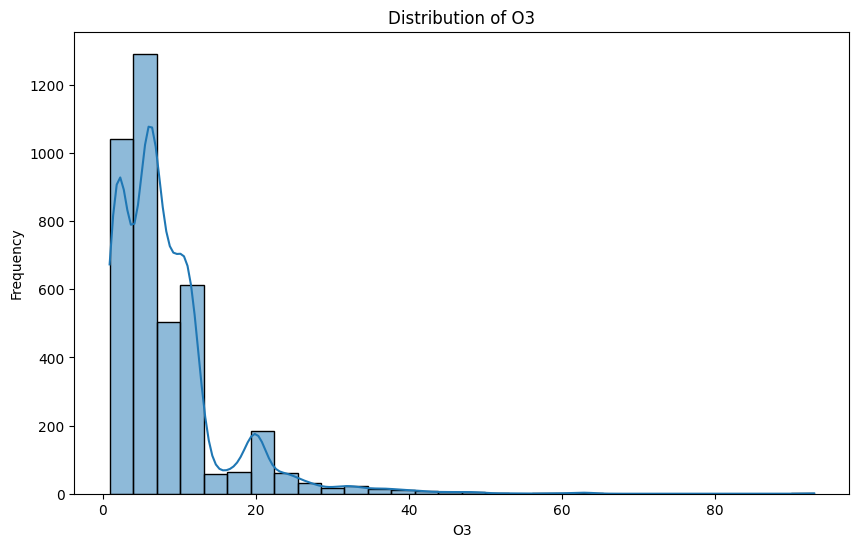

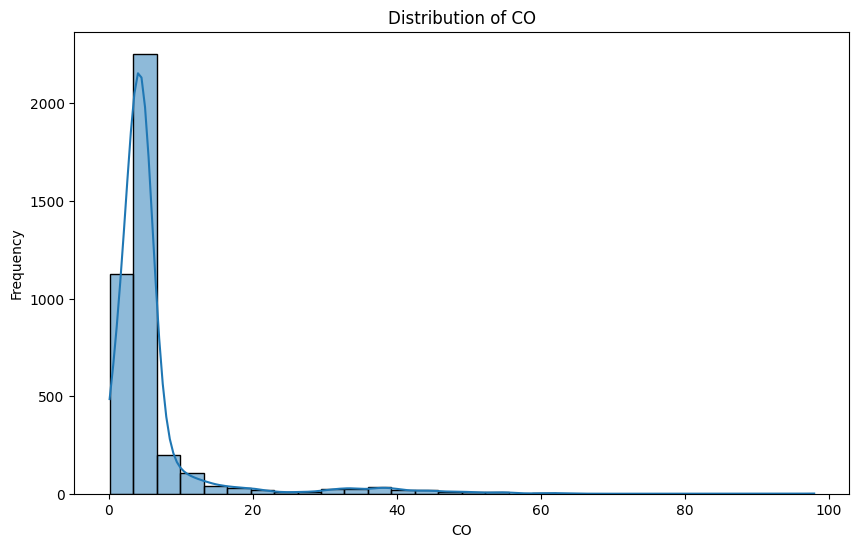

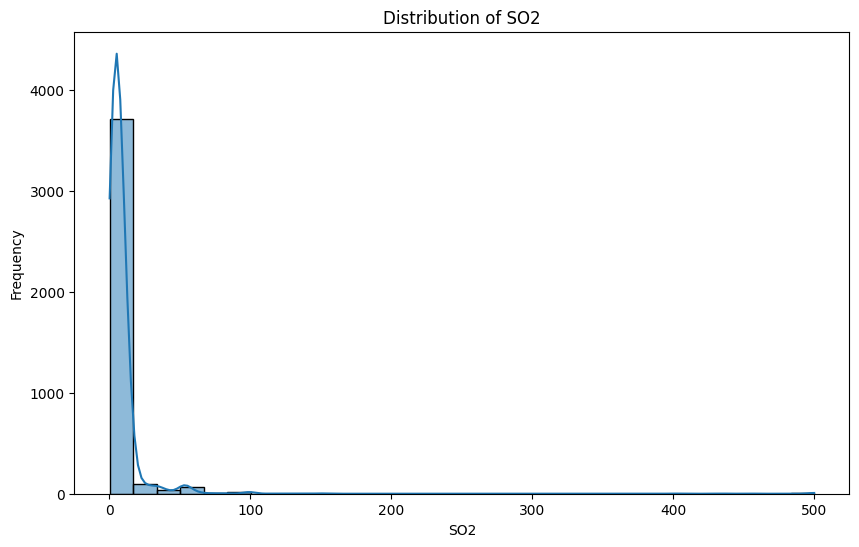

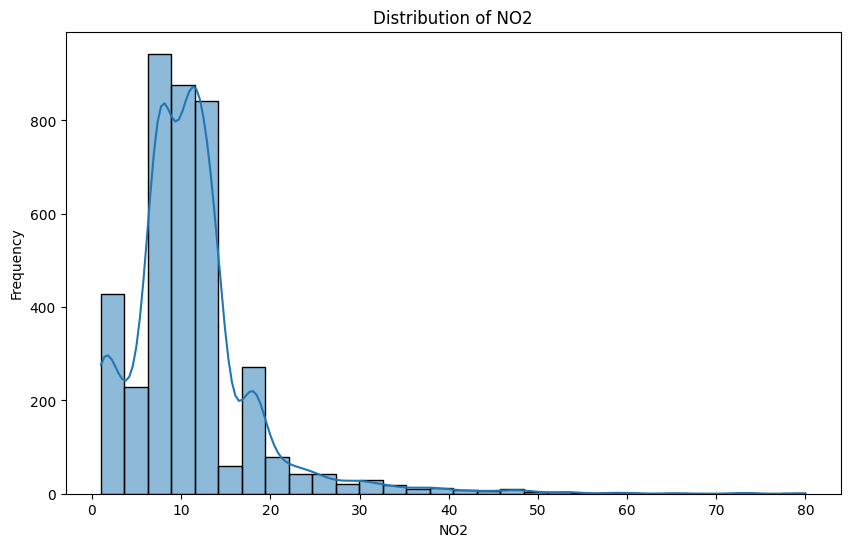

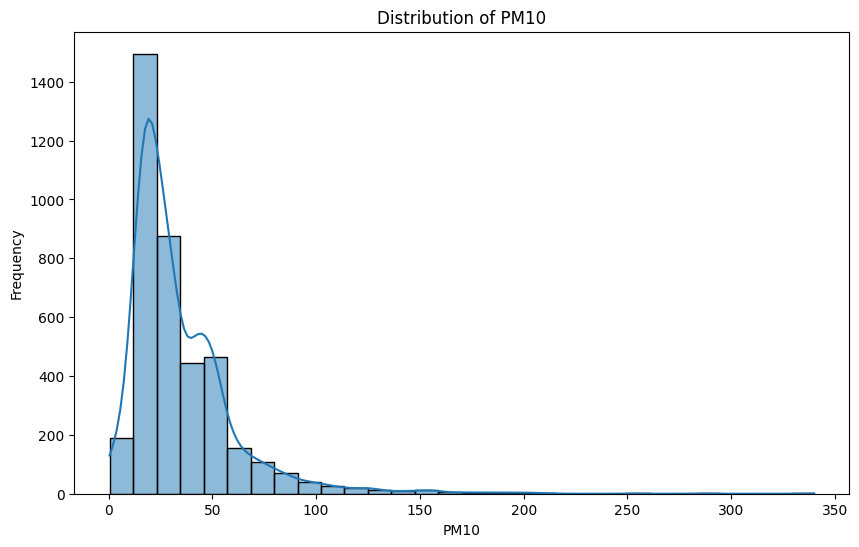

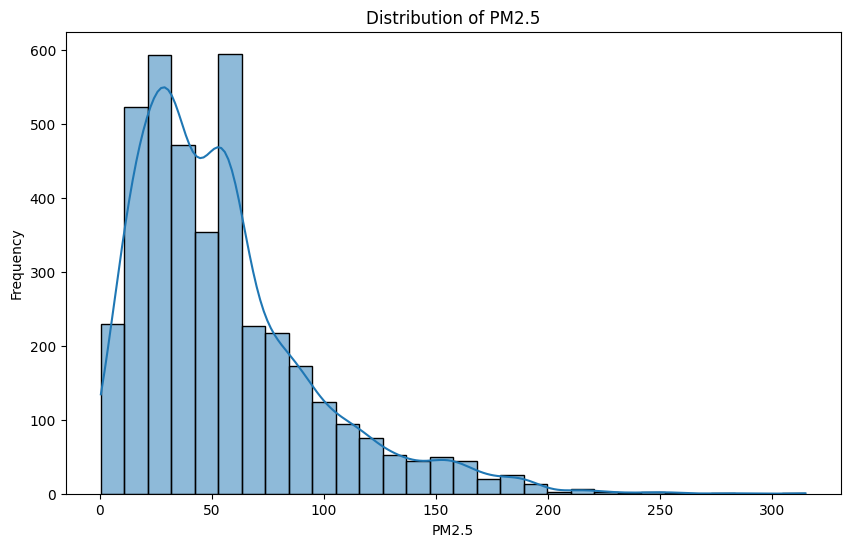

In [7]:
attributes = ["O3", "CO", "SO2", "NO2", "PM10", "PM2.5"]
CHART_DIR = r"E:\BTLPTDLL-2025\charts"
for attr in attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[attr].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {attr}')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.savefig(f"{CHART_DIR}/distribution_{attr}.png")
    plt.show()


#### Biểu đồ Box Plot

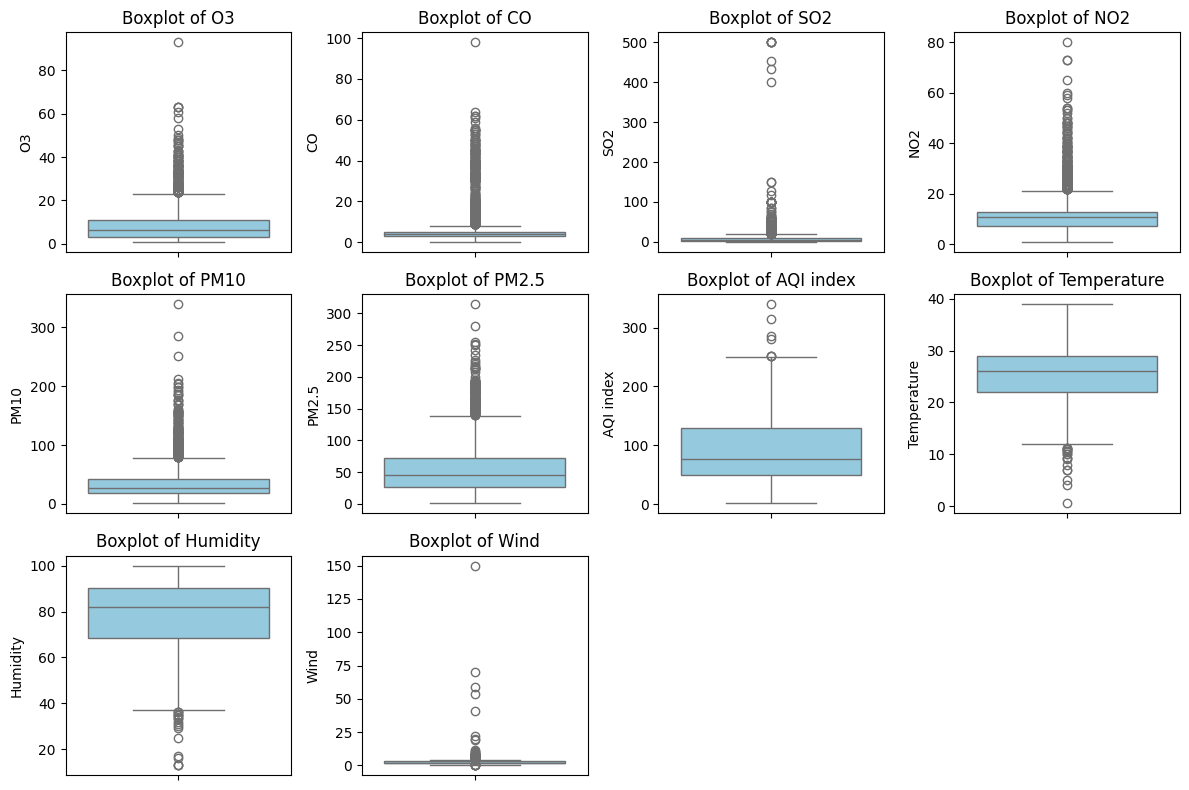

In [19]:
attributes = ["O3", "CO", "SO2", "NO2", "PM10", "PM2.5", "AQI index", "Temperature", "Humidity", "Wind"]

# Tạo một đối tượng Figure

plt.figure(figsize=(12, 8))
for i, attr in enumerate(attributes):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[attr].dropna(), color='skyblue')
    plt.title(f'Boxplot of {attr}')
    plt.ylabel(attr)
plt.tight_layout()
plt.savefig(f"{CHART_DIR}/boxplots_attributes.png")
plt.show()


***Nhận xét:***
- Biểu đồ trực quan trên thể hiện các chỉ số của một đối tượng (chất) là nguyên nhân góp phần gây ô nhiễm môi trường. 
- Với sự xuất hiện của 6 nhóm chất O3, CO, SO2, NO2, PM10 PM2.5 trong bảng dữ liệu.

**Ở sơ đồ Boxplot này hiển thị được các chỉ số (min, max, median, tứ phân vị,...) của một nhóm chất được ghi nhận lại trong năm 2020-2021. Điều này góp phần đánh giá toàn diện về nguy cơ ô nhiễm không khí, ảnh hưởng đến sửa khỏe người dân (nếu chỉ số vượt mức cho phép).**

### Barplot trung bình từng chỉ số theo thành phố

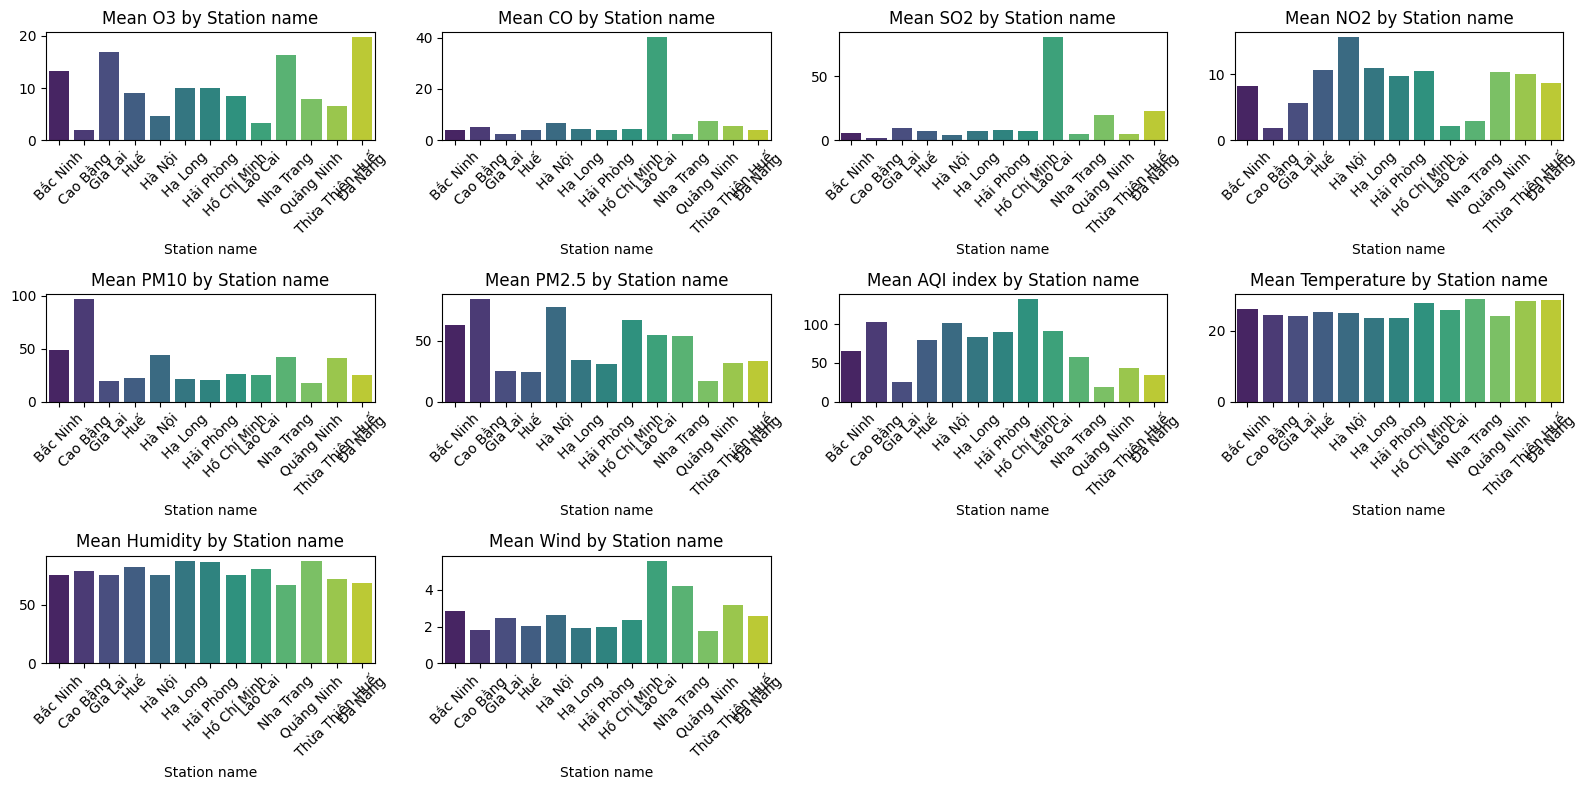

In [34]:
# 2. Barplot trung bình từng chỉ số theo từng loại air_quality
plt.figure(figsize=(16, 8))
for i, feature in enumerate(attributes):
    plt.subplot(3, 4, i + 1)
    mean_values = df.groupby('Station name')[feature].mean().sort_index()
    sns.barplot(hue=mean_values.index, y=mean_values.values,x= mean_values.index, palette='viridis')
    plt.title(f'Mean {feature} by Station name')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{CHART_DIR}/mean_attributes_by_station.png")
plt.show()

# AQI index

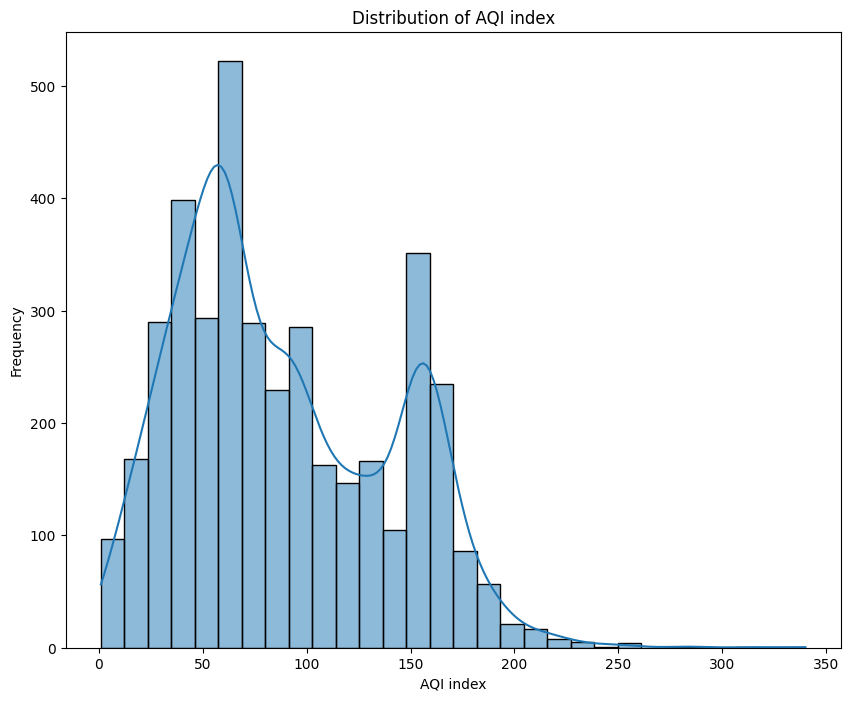

In [9]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="AQI index",  bins=30, kde=True)
plt.title('Distribution of AQI index')
plt.xlabel('AQI index')
plt.ylabel('Frequency')
plt.savefig(f"{CHART_DIR}/distribution_AQI_index.png")
plt.show()

***Nhận xét:***
- Đây là kết quả trực quan cho tần suất xuất hiện của AQI index trong năm. Có thể thấy số liệu AQI index tập trung ở khoảng 70~80, nhưng vẫn có rất nhiều lần là đạt mức >100 => Mức độ đáng báo độ về Chất lượng không khí tác động trực tiếp đến cuộc sống con người.

### Với mỗi cột kiểu dữ liệu dạng phi số thì các giá trị được phân bố như thế nào

In [10]:
cate_labels=["Station name","Dominent pollutant","Status"]
cate_rows=["missing_ratio","num_diff_vals","diff_vals"]
data_cate={}
for col in cate_labels:
    row=[]
    row.append(round(df[col].isnull().sum()/len(df[col])*100,3))
    data_cate.update({f'{col}':row})

    row.append(len(df[col][df[col].isna()==False].unique()))
    row.append(np.array(df[col][df[col].isna()==False].unique()))
    data_cate.update({f'{col}':row})

cate_col_df=pd.DataFrame(data_cate,index=cate_rows)
display(cate_col_df)

,Station name,Dominent pollutant,Status
missing_ratio,0.0,0.0,0.0
num_diff_vals,13,5,6
diff_vals,"[Huế, Hà Nội, Hạ Long, Hồ Chí Minh, Hải Phòng,...","[PM2.5, CO, aqi, PM10, O3]","[Moderate, Very Unhealthy, Unhealthy, Unhealth..."



Dữ liệu được cung cấp về chất lượng không khí của 13 địa điểm tại Việt Nam, bao gồm thông tin về 5 loại chất gây ô nhiễm chính. Để biểu thị mức độ ô nhiễm của môi trường, trạng thái chất lượng không khí được chia thành 6 nhóm. Điều này giúp người dân dễ dàng đánh giá và hạn chế việc ra khỏi nhà trong thời điểm chỉ số AQI cao, khi môi trường đang chịu tác động từ một hoặc nhiều chất độc hại.


## Các tỉnh thành được quan sát

In [11]:
fig = px.histogram(df, x="Station name", title="Station name Distribution",
                   labels={"Station name": "Station name"})
fig.show()
fig.write_image(r"E:\BTLPTDLL-2025\charts\station_name_distribution.png")


**Nhận xét số liệu thu thập:** 
- Dựa vào số liệu đã thu thập, trên khu vực Việt Nam vào năm 2020 và 2021, ta có dữ liệu của 13 vị trí thu thập chất lượng không khí.
Riêng số liệu của Hà Nội, Bắc Ninh được ghi nhận có phần vượt trội (nhiều) hơn những địa điểm khác, những địa điểm còn lại có số lượng dữ liệu được input không quá cao, khá đồng đều.

## BIỂU ĐỒ TRÒN VỀ TRẠNG THÁI CỦA MÔI TRƯỜNG

In [35]:
# Tính toán tần suất cho mỗi giá trị trong cột "Dominant pollutant"
pollutant_counts = df['Status'].value_counts()
pollutant_counts.name = "count"

# Vẽ biểu đồ tròn bằng plotly
fig = px.pie(pollutant_counts, values='count', names=pollutant_counts.index,
             title="Proportion of Status")
fig.write_image(f"{CHART_DIR}/status_proportion.png")
fig.show()

*Danh sách các mức độ ô nhiễm đưa ra đã được sắp xếp theo thứ tự tăng dần về độ an toàn:*

- Hazardous: Mức độ nguy hiểm cao nhất, chỉ số chất lượng không khí đạt mức rất cao và có thể gây nguy hiểm cho sức khỏe con người.
- Very Unhealthy: Mức độ rất không tốt, chỉ số chất lượng không khí đạt mức rất cao và có thể gây nguy hiểm cho sức khỏe con người.
- Unhealthy: Mức độ không tốt, chỉ số chất lượng không khí đạt mức cao và có thể gây hại cho sức khỏe con người.
- Unhealthy for Sensitive Groups: Mức độ không tốt cho nhóm nhạy cảm, chỉ số chất lượng không khí đạt mức cao và có thể gây hại cho những người nhạy cảm đối với ô nhiễm không khí.
- Moderate: Mức độ trung bình, chỉ số chất lượng không khí ở mức trung bình, không gây nguy hiểm cho sức khỏe con người.
- Good: Mức độ tốt nhất, chỉ số chất lượng không khí ở mức tốt, không có nguy cơ đáng kể đối với sức khỏe con người.

***Nhận xét:***
- Theo thống kê đã nêu, tỉ lệ mà không khí đạt ở mức sạch nằm trong khoảng 26.2%, mức tạm ổn (Moderate) thì đặt khoảng 38.1%. Với 2 chỉ số trên hiển thị trạng thái không khí không ảnh hưởng đến sức khỏe người dân ở mức 65%.
- Vậy là với 35% trạng thái ghi nhận là có thể gây ảnh hướng để sức khỏe cả con người => **là một chỉ số đáng báo động.**
  - Cụ thể là: 
    - Đã ghi nhận được 2/3941 lần trạng thái không khí được ghi nhận ở mức báo động cao nhất - Hazadous, gây nguy hiểm trực tiếp đến sức khỏe.
    - 17.3% cho thấy không khí có thể tác động đến nhóm người bị nhạy cảm với ô nhiễm không khí, 17.3% là không tốt với sức khỏe.
    - Trạng thái Very Unhealthy cũng xuất hiện với 42 lần cho thấy chất lượng không khí đang báo động trầm trọng.

## Chất ô nhiễm chủ đạo

In [36]:
pollutant_counts = df['Dominent pollutant'].value_counts()
pollutant_counts.name = "count"
# Vẽ biểu đồ tròn bằng plotly
fig = px.pie(pollutant_counts, values='count', names=pollutant_counts.index,
             title="Proportion of Dominent pollutant")
fig.write_image(f"{CHART_DIR}/dominent_pollutant_proportion.png")
fig.show()

***Nhận xét:***
- Biểu đồ trên hiển thị các chất gây ô nhiễm chủ yếu đến môi trường. Đa phần đó là do bụi mịn có kích thước nhỏ hơn 2.5 micromet (pm25).
- Theo sau là chỉ số là PM10 - bụi mình có kích thước nhỏ hơn 10 micromet (6,2%).

#### Biểu đồ Heatmap

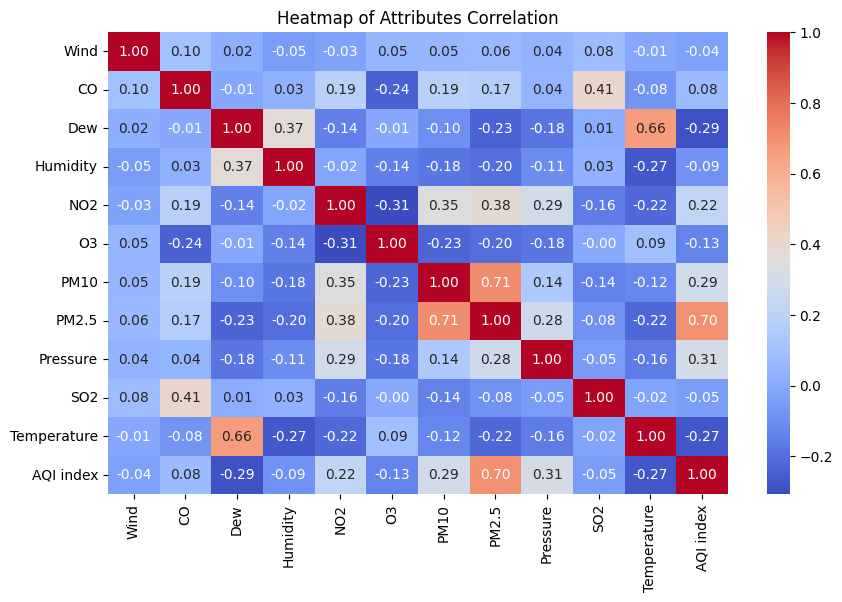

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Attributes Correlation')
plt.show()

# Nhận xét
***Các biến có tương quan cao với AQI index***
- Các biến có độ tương quan cao với AQI index lần lượt là PM2.5 (0.7) và PM10 (0.29)
- Các chất khí như CO, NO2, O3, SO2 có hệ số tương quan với AQI index thấp hơn nhiều.

***Mối liên hệ giữa các chất ô nhiễm***
- Giữa PM2.5 và PM10 có tương quan cao (0.71) vì chúng là hai loại bụi mịn thường xuất hiện đồng thời với nhau.
- SO2 và CO có tương quan vừa (0.41).

***Ảnh hưởng của thời tiết***
- Nhiệt độ tăng, AQI giảm
- Độ ẩm (Humidity) có tương quan rất thấp với AQI
- Gió gần như không có ảnh hưởng tới AQI ở dataset này.

